In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comp=pd.read_csv("Company_Data.csv")
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


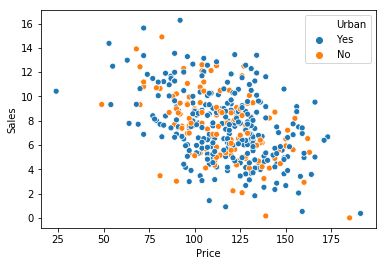

In [3]:
sns.scatterplot(x = comp['Price'], y = comp['Sales'],hue = comp['Urban'])

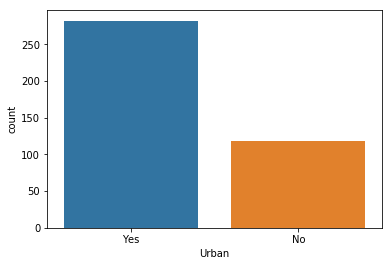

In [4]:
sns.countplot(x = comp['Urban'],data=comp)

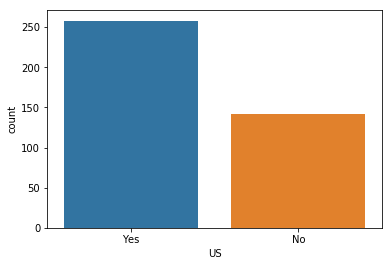

In [5]:
sns.countplot(x = comp['US'],data=comp)

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


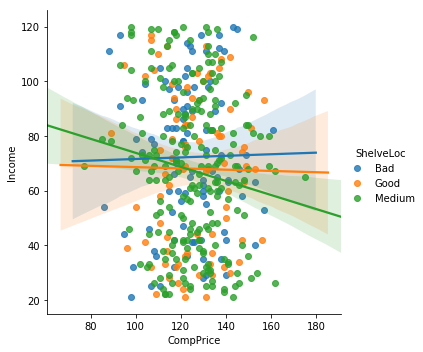

In [6]:
sns.lmplot(x='CompPrice',y='Income',data=comp,hue='ShelveLoc')

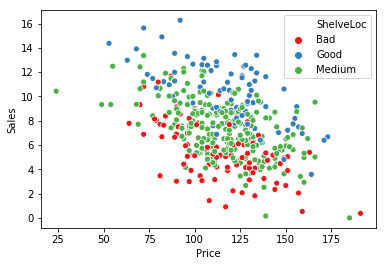

In [7]:
sns.scatterplot(x = comp['Price'], y = comp['Sales'],hue = comp['ShelveLoc'],palette='Set1')

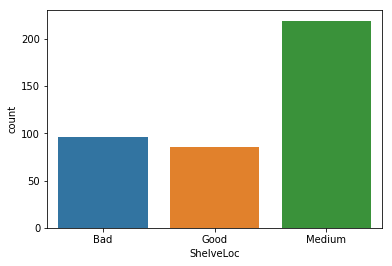

In [8]:
sns.countplot(comp['ShelveLoc'],data=comp)


In [9]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
Column_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

In [13]:
comp['Target_sales'] = '>= 10'
comp.loc[comp['Sales']>= 10 , 'Target_sales'] = 'High Sales'
comp.loc[comp['Sales']< 10 , 'Target_sales'] = 'Low Sales'

In [14]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales


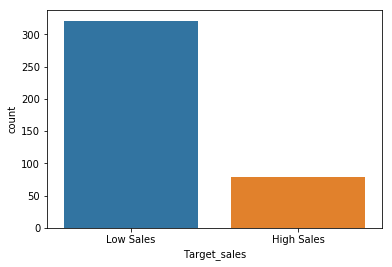

In [15]:
sns.countplot(comp['Target_sales'],data = comp)

In [16]:
# Using Label encoder to convert the data to discrete value
from sklearn.preprocessing import LabelEncoder

In [17]:
Le = LabelEncoder()

In [18]:
for column_name in comp.columns:
    if comp[column_name].dtype == object:
        comp[column_name] = Le.fit_transform(comp[column_name])
    else:
        pass

In [19]:
comp['ShelveLoc'].dtype

dtype('int64')

In [20]:
comp['Target_sales'] = '>= 10'
comp.loc[comp['Sales']>= 9 , 'Target_sales'] = 'High Sales'
comp.loc[comp['Sales']< 9 , 'Target_sales'] = 'Low Sales'

In [21]:
X = comp.iloc[:,1:11]
X

Y = comp.iloc[:,11]
Y.head()

0    High Sales
1    High Sales
2    High Sales
3     Low Sales
4     Low Sales
Name: Target_sales, dtype: object

In [22]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
# fitting and predicting the model.

from sklearn.tree import DecisionTreeClassifier

In [25]:
Classifier = DecisionTreeClassifier(criterion='gini')

In [26]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
Xpred = Classifier.predict(X_test)

In [41]:
# Find the accuracy of the data

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[14, 12],
       [15, 79]], dtype=int64)

In [43]:
acc = accuracy_score(Xpred,y_test)*100
acc

77.5

In [44]:
# tuning the data.

Classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=50)

In [45]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
Xpred = Classifier.predict(X_test)

In [47]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[14, 12],
       [15, 79]], dtype=int64)

In [48]:
acc = accuracy_score(Xpred,y_test)*100
acc

77.5

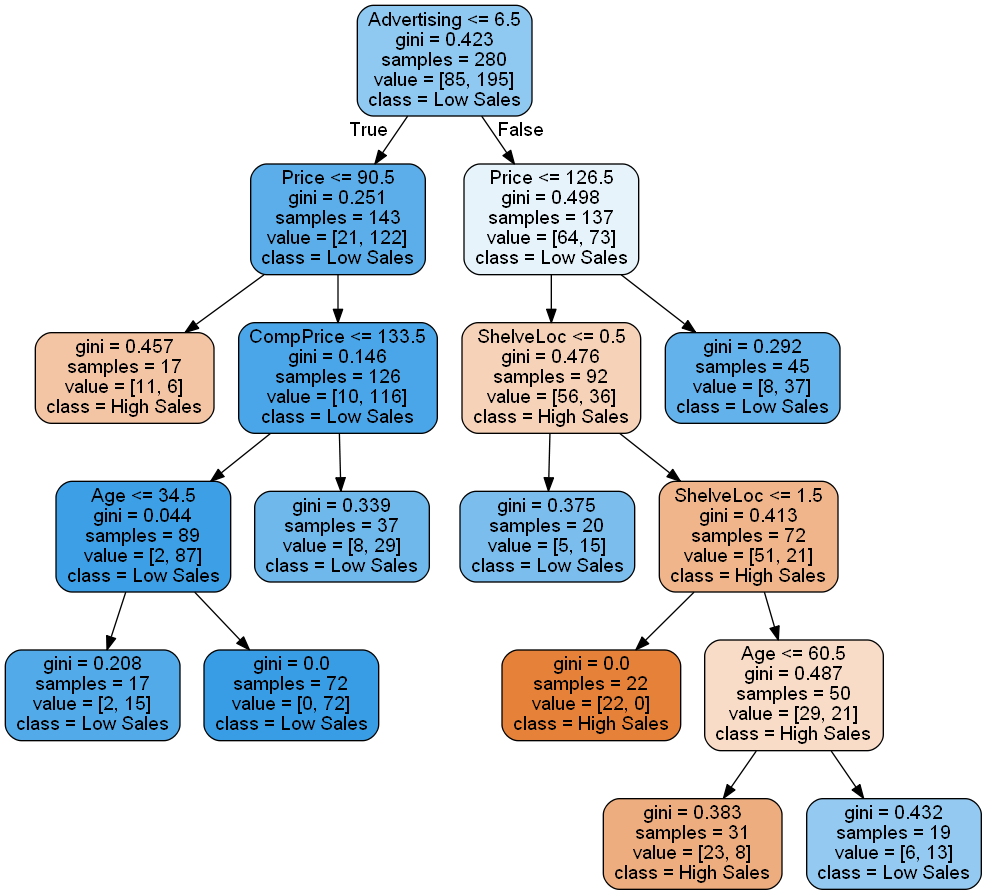

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(Classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = Column_names ,class_names= ['High Sales','Low Sales'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [50]:
predictors = comp[['CompPrice', 'Income', 'Population', 'Price', 'Sales' ]]
predictors.head()

,CompPrice,Income,Population,Price,Sales
0,138,73,276,120,9.50
1,111,48,260,83,11.22
2,113,35,269,80,10.06
3,117,100,466,97,7.40
4,141,64,340,128,4.15


In [51]:
Target = comp['Urban']
Target.head()

0    1
1    1
2    1
3    1
4    1
Name: Urban, dtype: int64

In [54]:
print(classification_report(Xpred,y_test))

             precision    recall  f1-score   support

 High Sales       0.48      0.54      0.51        26
  Low Sales       0.87      0.84      0.85        94

avg / total       0.78      0.78      0.78       120

